# Correlation Analysis

In [1]:
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### the statement below ask matplotlib to use the 'ggplot' style
#### you should consider using that
plt.style.use('ggplot')

In [2]:
data_min_max = pd.read_csv('data_skew_imputed_outliers_fixed_min_max.csv')

# Min max pipline

In [18]:
# removed categorical columns & original columns (pre-imputation)

filter_data_min_max=['T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio',
       'C1_Imput','C4_Imput','C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_outliner_fix', 'T5_Imput_ratio_outliner_fix',
       'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix', 'C1_Imput_outliner_fix_min_max','C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'T4_Imput_ratio_outliner_fix_min_max',
       'T5_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']
data_min_max_filtered = data_min_max[filter_data_min_max]
data_min_max_filtered.shape

(660, 31)

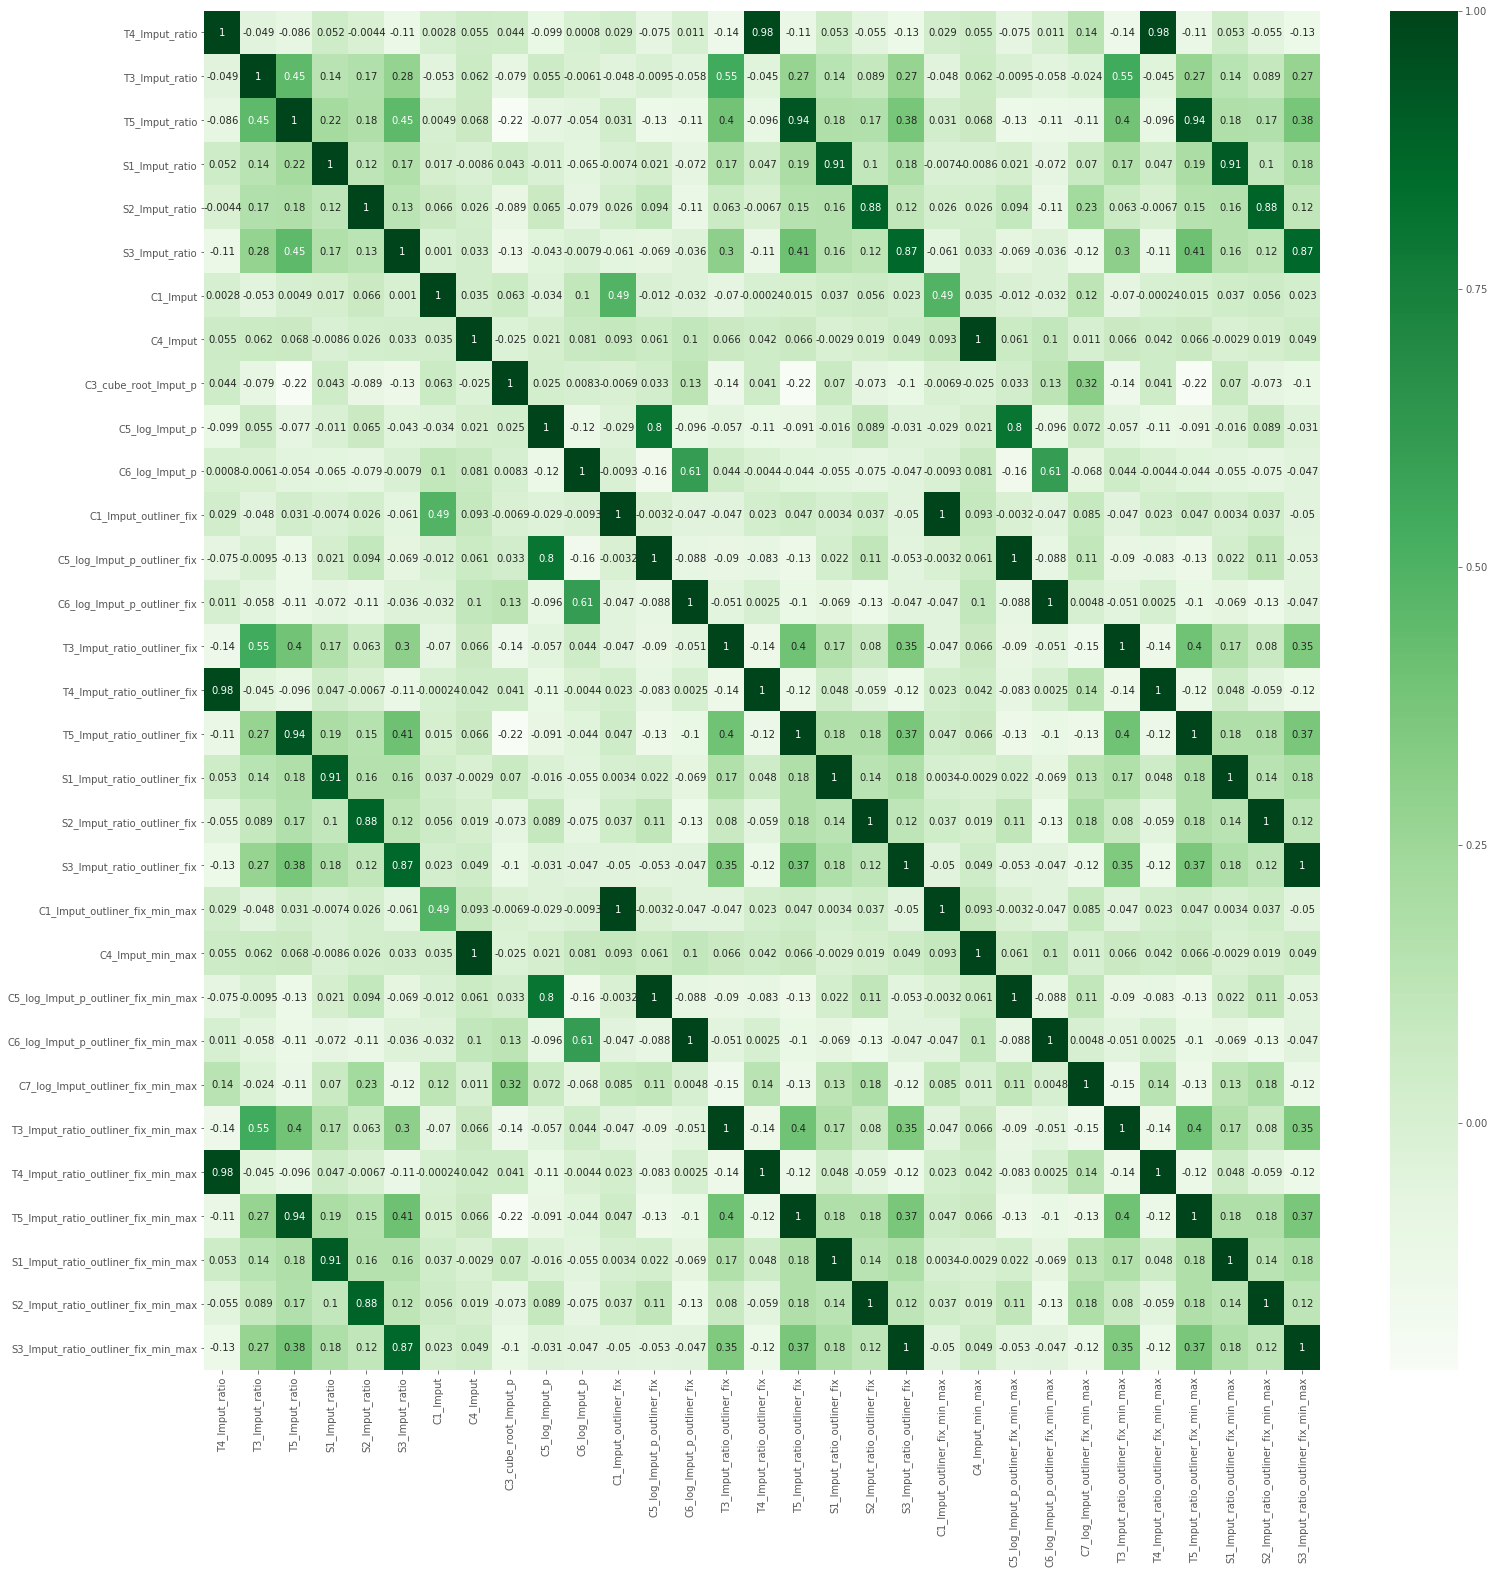

In [9]:
# heatmap detailing relationships between min-max features
plt.figure(figsize= (25,25))
corr = data_min_max_filtered.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.Greens)
plt.show()

In [23]:
# removed categorical columns & original columns (pre-imputation)

filter_data_min_max=['Y1','T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio',
       'C1_Imput','C4_Imput','C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_outliner_fix', 'T5_Imput_ratio_outliner_fix',
       'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix', 'C1_Imput_outliner_fix_min_max','C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'T4_Imput_ratio_outliner_fix_min_max',
       'T5_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']
data_min_max_filtered_Y = data_min_max[filter_data_min_max]
data_min_max_filtered_Y.head()

,Y1,T4_Imput_ratio,T3_Imput_ratio,T5_Imput_ratio,S1_Imput_ratio,S2_Imput_ratio,S3_Imput_ratio,C1_Imput,C4_Imput,C3_cube_root_Imput_p,...,C4_Imput_min_max,C5_log_Imput_p_outliner_fix_min_max,C6_log_Imput_p_outliner_fix_min_max,C7_log_Imput_outliner_fix_min_max,T3_Imput_ratio_outliner_fix_min_max,T4_Imput_ratio_outliner_fix_min_max,T5_Imput_ratio_outliner_fix_min_max,S1_Imput_ratio_outliner_fix_min_max,S2_Imput_ratio_outliner_fix_min_max,S3_Imput_ratio_outliner_fix_min_max
0,0,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,122.0,0.029074,1,...,0.749962,0.495741,0.583333,0.405237,0.638012,0.523556,0.565074,0.422402,0.515574,0.453823
1,1,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,259.0,-0.013352,0,...,0.583748,0.376259,0.000000,0.317003,0.537617,0.536352,0.483018,0.213730,0.655044,0.449531
2,1,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,90.0,0.020715,0,...,0.717213,0.531929,0.000000,0.154585,0.642696,0.512883,0.781070,0.600773,0.301377,0.492216
3,1,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,209.0,0.020023,0,...,0.714502,0.538069,0.000000,0.173269,0.718941,0.225546,0.777223,0.600773,0.365204,0.647441
4,0,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,80.0,-0.034895,1,...,0.499347,0.503020,0.262500,0.729625,0.436206,0.366813,0.401243,0.376353,0.577647,0.480750


In [29]:
# check if features are highly + OR - correlated with Y1
how_corr = (data_min_max_filtered_Y.corr()['Y1']> .5) | (data_min_max_filtered_Y.corr()['Y1']< -.5)
print(how_corr[how_corr == True])

Y1                                     True
C6_log_Imput_p_outliner_fix            True
C6_log_Imput_p_outliner_fix_min_max    True
Name: Y1, dtype: bool


# Z-score pipline

In [6]:
data_z = pd.read_csv('https://raw.githubusercontent.com/Farisalenezy/project1-fae-master/master/data_imputed_outliers_fixed_cube_root_zscore.csv?token=ANCTJUJK2W6GGPWKOTZ23IK6KXMLI')

In [13]:
# filtering categorical and pre-imputed columns from z-score file

filter_data_z=['T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 
       'C1_Imput', 'C4_Imput', 
      'C3_Imput_p', 'C5_Imput_p', 'C6_Imput_p',
       'C1_Imput_outliner_fix', 'C5_Imput_p_outliner_fix',
       'C6_Imput_p_outliner_fix', 'C7_Imput_outliner_fix',
       'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix',
       'T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix',
       'S2_Imput_ratio_outliner_fix', 'S3_Imput_ratio_outliner_fix',
       'C6_Imput_p_outliner_fix_cube_root', 'C7_Imput_outliner_fix_cube_root',
     'C3_Imput_p_zscore', 'C4_Imput_zscore',
       'C5_Imput_p_outliner_fix_zscore',
       'C6_Imput_p_outliner_fix_cube_root_zscore',
       'C7_Imput_outliner_fix_cube_root_zscore',
       'T3_Imput_ratio_outliner_fix_zscore',
       'T4_Imput_ratio_outliner_fix_zscore',
       'T5_Imput_ratio_outliner_fix_zscore',
       'S1_Imput_ratio_outliner_fix_zscore',
       'S2_Imput_ratio_outliner_fix_zscore',
       'S3_Imput_ratio_outliner_fix_zscore']
data_z_filtered2 = data_z[filter_data_z]
data_z_filtered2.shape

(660, 34)

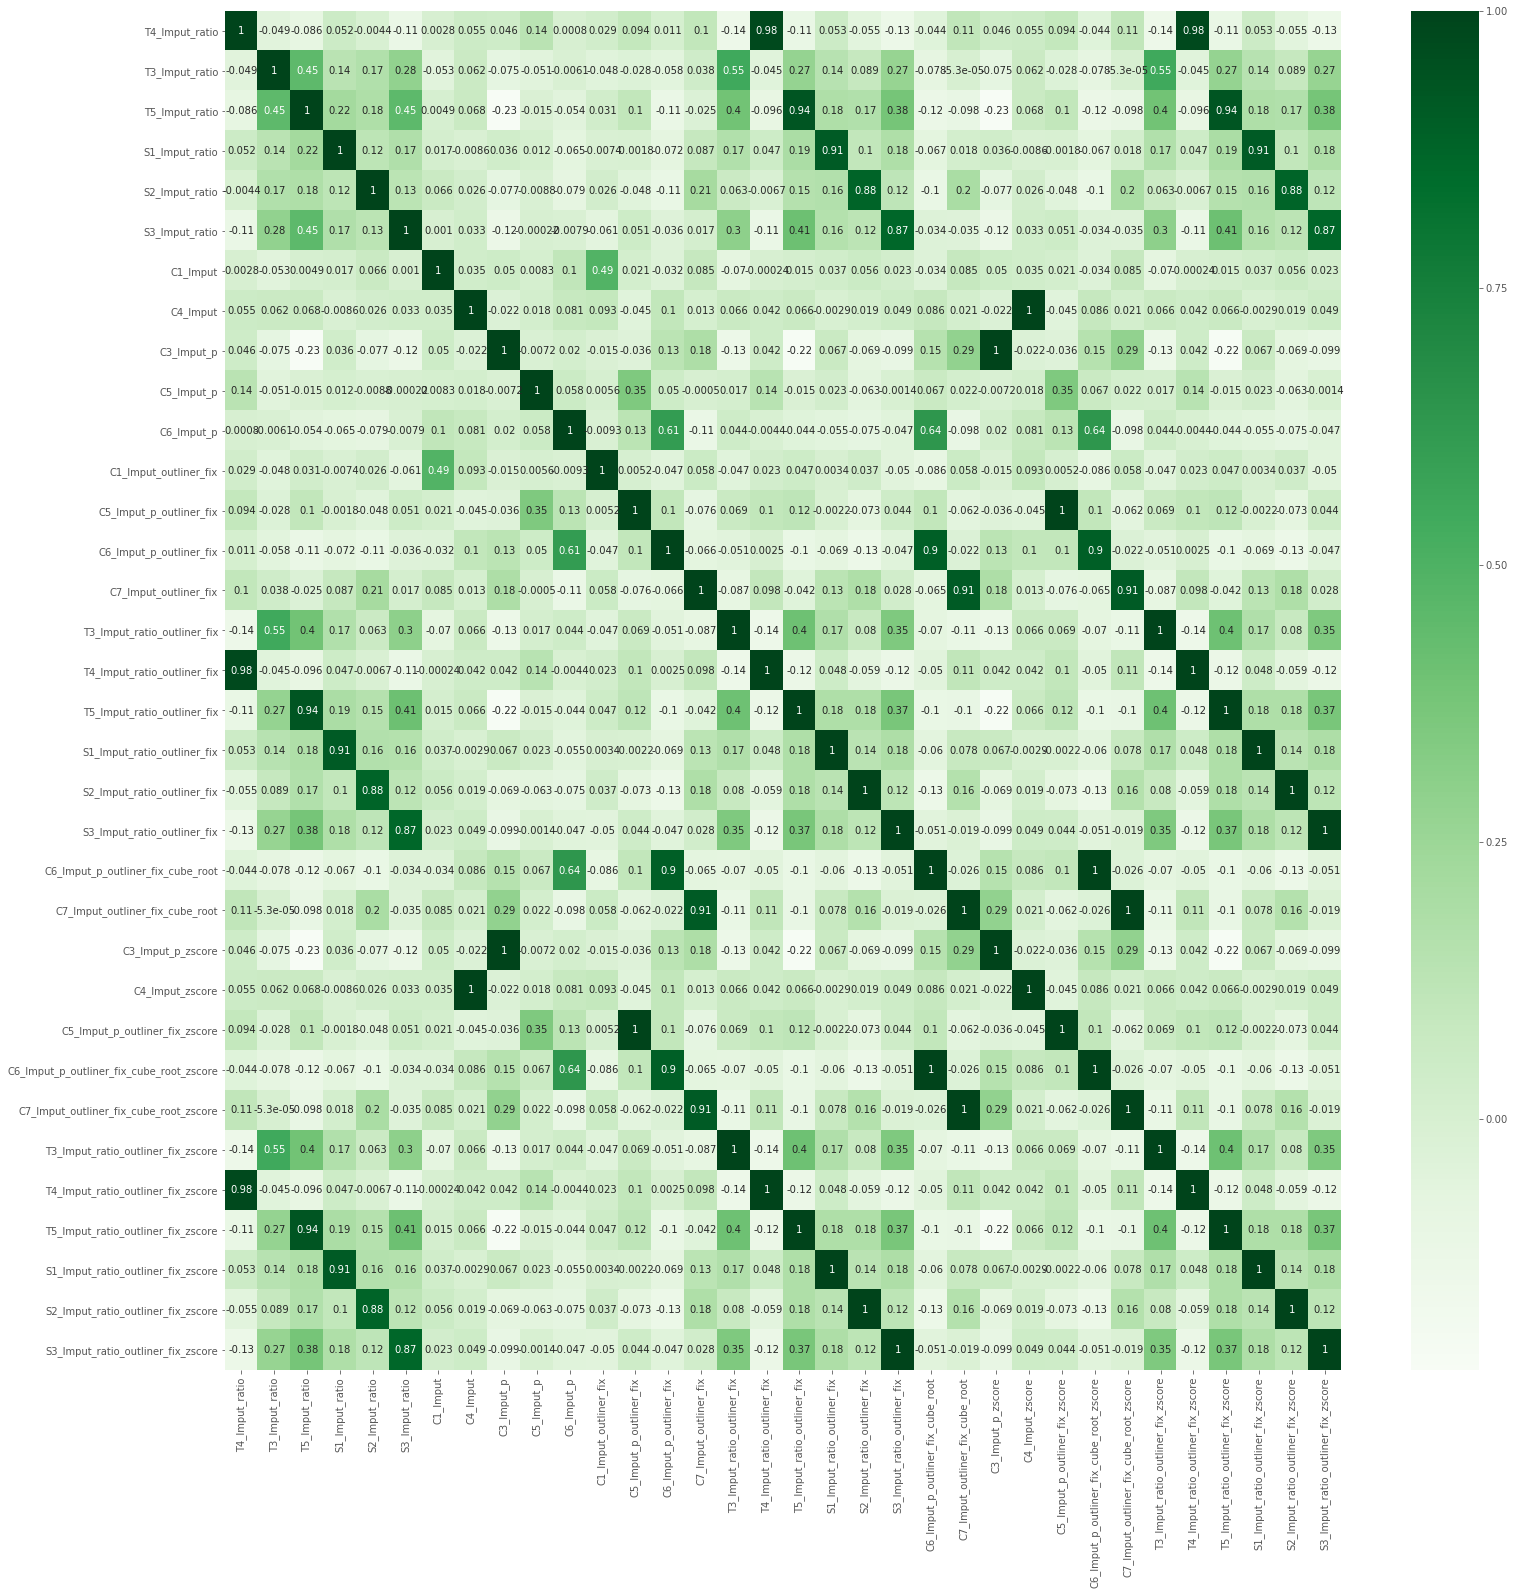

In [14]:
# heatmap for z-score features
plt.figure(figsize= (25,25))
corr = data_z_filtered2.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.Greens)
plt.show()

In [25]:
# filtering categorical and pre-imputed columns from z-score file

filter_data_z=['Y1', 'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 
       'C1_Imput', 'C4_Imput', 
      'C3_Imput_p', 'C5_Imput_p', 'C6_Imput_p',
       'C1_Imput_outliner_fix', 'C5_Imput_p_outliner_fix',
       'C6_Imput_p_outliner_fix', 'C7_Imput_outliner_fix',
       'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix',
       'T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix',
       'S2_Imput_ratio_outliner_fix', 'S3_Imput_ratio_outliner_fix',
       'C6_Imput_p_outliner_fix_cube_root', 'C7_Imput_outliner_fix_cube_root',
     'C3_Imput_p_zscore', 'C4_Imput_zscore',
       'C5_Imput_p_outliner_fix_zscore',
       'C6_Imput_p_outliner_fix_cube_root_zscore',
       'C7_Imput_outliner_fix_cube_root_zscore',
       'T3_Imput_ratio_outliner_fix_zscore',
       'T4_Imput_ratio_outliner_fix_zscore',
       'T5_Imput_ratio_outliner_fix_zscore',
       'S1_Imput_ratio_outliner_fix_zscore',
       'S2_Imput_ratio_outliner_fix_zscore',
       'S3_Imput_ratio_outliner_fix_zscore']
data_z_filtered2_Y = data_z[filter_data_z]
data_z_filtered2_Y.head()

,Y1,T4_Imput_ratio,T3_Imput_ratio,T5_Imput_ratio,S1_Imput_ratio,S2_Imput_ratio,S3_Imput_ratio,C1_Imput,C4_Imput,C3_Imput_p,...,C4_Imput_zscore,C5_Imput_p_outliner_fix_zscore,C6_Imput_p_outliner_fix_cube_root_zscore,C7_Imput_outliner_fix_cube_root_zscore,T3_Imput_ratio_outliner_fix_zscore,T4_Imput_ratio_outliner_fix_zscore,T5_Imput_ratio_outliner_fix_zscore,S1_Imput_ratio_outliner_fix_zscore,S2_Imput_ratio_outliner_fix_zscore,S3_Imput_ratio_outliner_fix_zscore
0,0,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,122.0,0.029074,1,...,0.654566,0.010215,1.304068,-0.638509,0.683565,0.171218,0.334955,-0.216721,0.171342,-0.159743
1,1,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,259.0,-0.013352,0,...,-0.619777,0.724532,-0.787904,-0.974205,0.145156,0.235579,-0.110184,-1.289533,0.957802,-0.182632
2,1,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,90.0,0.020715,0,...,0.403480,-0.345815,-0.787904,-1.446763,0.708680,0.117539,1.506698,0.700302,-1.036496,0.045025
3,1,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,209.0,0.020023,0,...,0.382698,-0.395737,-0.787904,-1.400485,1.117577,-1.327650,1.485825,0.700302,-0.676577,0.872906
4,0,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,80.0,-0.034895,1,...,-1.266863,-0.089054,1.193357,1.329414,-0.398705,-0.617137,-0.553799,-0.453466,0.521369,-0.016128


In [30]:
# check if features are highly + OR - correlated with Y1
how_corrZ = (data_z_filtered2_Y.corr()['Y1']> .5) | (data_z_filtered2_Y.corr()['Y1']< -.5)
print(how_corrZ[how_corrZ == True])

Y1                                          True
C6_Imput_p_outliner_fix                     True
C6_Imput_p_outliner_fix_cube_root           True
C6_Imput_p_outliner_fix_cube_root_zscore    True
Name: Y1, dtype: bool
